<a href="https://colab.research.google.com/github/brendanbautista/is_4487_base/blob/main/Week10Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/content/adviseinvest (1).csv')

Plot 1

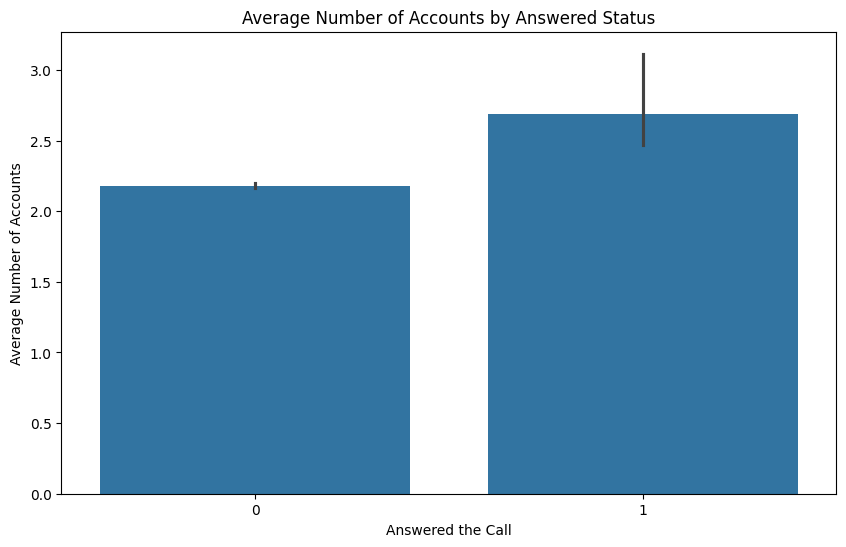

In [4]:
# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='answered', y='num_accts', data=df)
plt.title('Average Number of Accounts by Answered Status')
plt.xlabel('Answered the Call')
plt.ylabel('Average Number of Accounts')
plt.show()

Plot 2

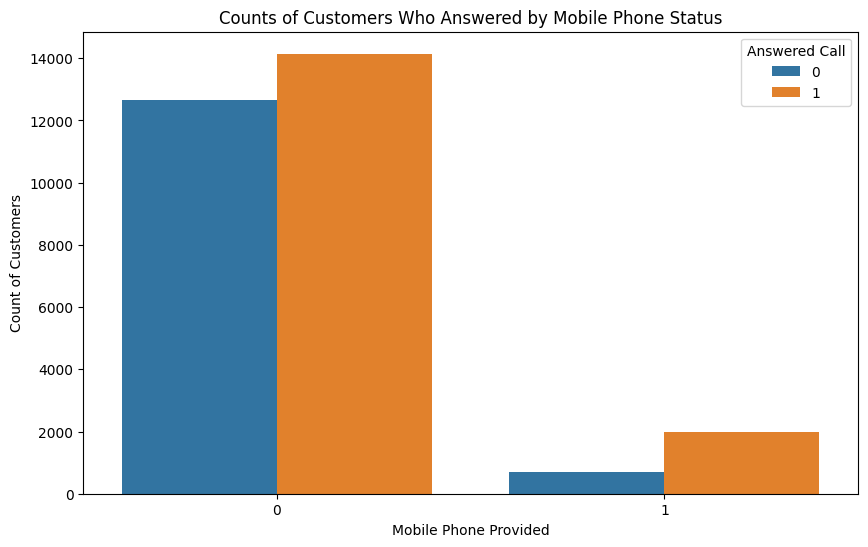

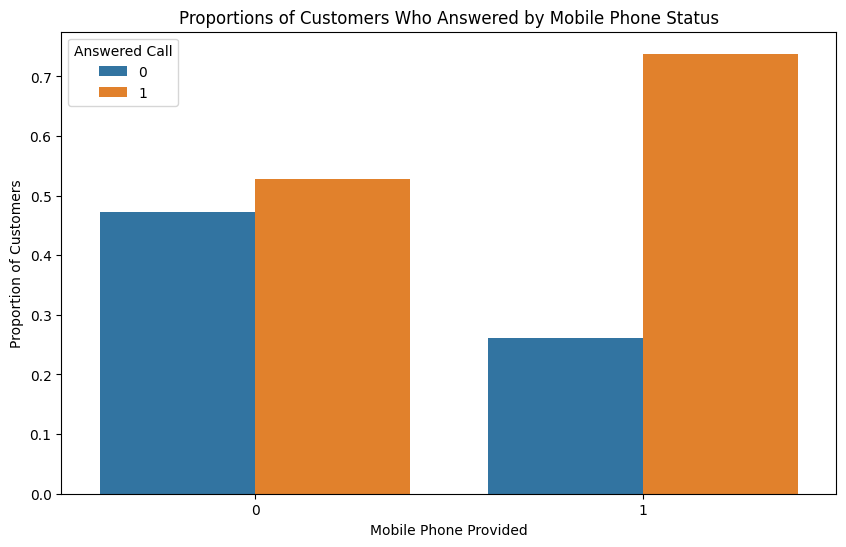

In [5]:
# Convert 'mobile' to a categorical variable
df['mobile'] = pd.Categorical(df['mobile'])

# Create a table of counts for 'answered' at each level of 'mobile'
counts_table = pd.crosstab(df['answered'], df['mobile'])

# To create a barplot of counts, we need to 'melt' the table so it can be fed into seaborn's barplot function
counts_table_melted = counts_table.reset_index().melt(id_vars="answered")

# Challenge: Create a table of proportions
proportions_table = counts_table.div(counts_table.sum(axis=0), axis=1)
proportions_table_melted = proportions_table.reset_index().melt(id_vars="answered")

# Plotting the counts barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='mobile', y='value', hue='answered', data=counts_table_melted)
plt.title('Counts of Customers Who Answered by Mobile Phone Status')
plt.xlabel('Mobile Phone Provided')
plt.ylabel('Count of Customers')
plt.legend(title='Answered Call')
plt.show()

# Plotting the challenge: proportions barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='mobile', y='value', hue='answered', data=proportions_table_melted)
plt.title('Proportions of Customers Who Answered by Mobile Phone Status')
plt.xlabel('Mobile Phone Provided')
plt.ylabel('Proportion of Customers')
plt.legend(title='Answered Call')
plt.show()


# **Start of Week 10 Assignment**

In [7]:
# Since the direct calculation approach previously faced issues, let's retry accessing the dataset and calculate the majority class classifier's accuracy.

# Re-load the dataset to ensure it's in a clean state for this calculation.
df_reload = pd.read_csv('/content/adviseinvest (1).csv')

# Calculate the proportion of the majority class, which is 'answered' calls in this dataset.
# The 'answered' column is already in binary format where 1 indicates a call was answered.
majority_class_accuracy = df_reload['answered'].mean()

# Round the accuracy to three decimal places for the requested precision.
rounded_majority_class_accuracy = round(majority_class_accuracy, 3)

rounded_majority_class_accuracy


0.547

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Prepare the data
X = df[['income']]  # Using 'income' as the feature
y = df['answered']  # 'answered' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the decision tree model with a maximum depth of 2
income_model = DecisionTreeClassifier(max_depth=2, random_state=42)
income_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = income_model.predict(X_test)

# Calculate the accuracy of the model
income_model_accuracy = accuracy_score(y_test, y_pred)

# Round the accuracy to three decimal places
rounded_income_model_accuracy = round(income_model_accuracy, 3)

rounded_income_model_accuracy


0.612

In [10]:
import numpy as np

# Function to calculate entropy
def entropy(p1, p2):
    # Ensure we're not taking log of zero by replacing zero probabilities with a very small number
    p1 = np.where(p1 == 0, 1e-9, p1)
    p2 = np.where(p2 == 0, 1e-9, p2)
    return -(p1 * np.log2(p1) + p2 * np.log2(p2))

# Calculate proportions in parent
total_parent = len(df)
answered_parent = df['answered'].sum()
not_answered_parent = total_parent - answered_parent
p1_parent = answered_parent / total_parent
p2_parent = not_answered_parent / total_parent

# Entropy of parent
entropy_parent = entropy(p1_parent, p2_parent)

# Split data based on income >= 39135
c1 = df[df['income'] >= 39135]
c2 = df[df['income'] < 39135]

# Calculate proportions for children
p_c1 = len(c1) / total_parent
p_c2 = len(c2) / total_parent

answered_c1 = c1['answered'].sum()
not_answered_c1 = len(c1) - answered_c1
p1_c1 = answered_c1 / len(c1)
p2_c1 = not_answered_c1 / len(c1)

answered_c2 = c2['answered'].sum()
not_answered_c2 = len(c2) - answered_c2
p1_c2 = answered_c2 / len(c2)
p2_c2 = not_answered_c2 / len(c2)

# Entropy of children
entropy_c1 = entropy(p1_c1, p2_c1)
entropy_c2 = entropy(p1_c2, p2_c2)

# Calculate Information Gain (IG)
IG = entropy_parent - (p_c1 * entropy_c1 + p_c2 * entropy_c2)

# Report IG to three decimal places
IG_rounded = round(IG, 3)
IG_rounded


0.036